# Sea ice segmentation
IPython Notebook to demonstrate three different segmentation of sea ice images 
for the XSEDE Polar Hackathon

Contributing authors: Alek Petty, Andrew Barrett, Xin Miao, Phil McDowell, Vivek Balasubramanian
 

Additional info: Just testing out different scikit-learn (skimage) image segmentation functions. 
Plan is to then use these objects (rather than pixels) to drive the sea ice classification (add link to notebook)
    
Segmentation comparison inspired by http://scikit-image.org/docs/dev/auto_examples/plot_segmentations.html

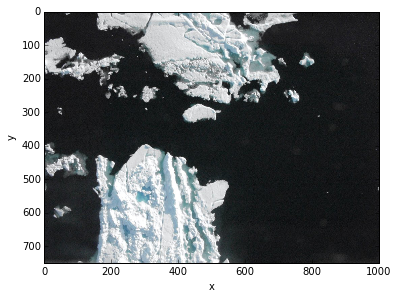

In [31]:
%matplotlib inline
#import cv2
from pylab import *
from scipy import misc
from skimage.segmentation import mark_boundaries

filePath = "../../../DATA/IMAGERY/XIN/072610_00104.jpg"

img = misc.imread(filePath)
fig1 = figure(figsize=(6, 6))
xlabel('x')
ylabel('y')
imshow(img)
plt.show()

In [32]:
# K-means segementation
from skimage.segmentation import slic
labeled_img2 = slic(img, n_segments=4, compactness=1)

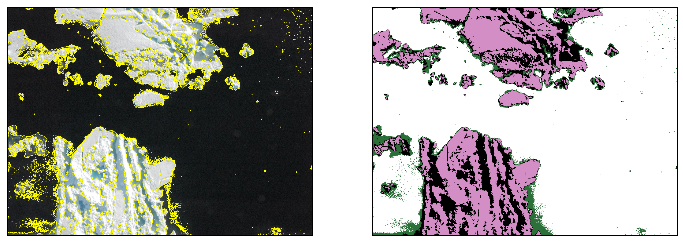

In [33]:
# plot out segmentation
fig3, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
ax[0].imshow(mark_boundaries(img, labeled_img2))
ax[1].imshow(labeled_img2, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [34]:
from skimage.segmentation import felzenszwalb
labeled_img3 = felzenszwalb(img, scale=100, sigma=0.5)


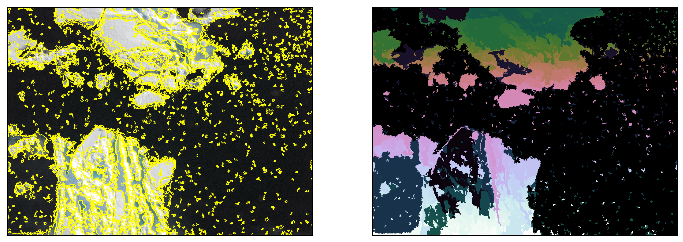

In [35]:
fig4, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
ax[0].imshow(mark_boundaries(img, labeled_img3))
ax[1].imshow(labeled_img3, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [36]:
# Quickshift segmentation
# While the results lok odd, the polygons do seem to bound regions quite nicely. 
# Clearly need to classify and merge cells of similar type 

from skimage.segmentation import quickshift
labeled_img4 = quickshift(img, kernel_size=5, max_dist=10, ratio=0.5)

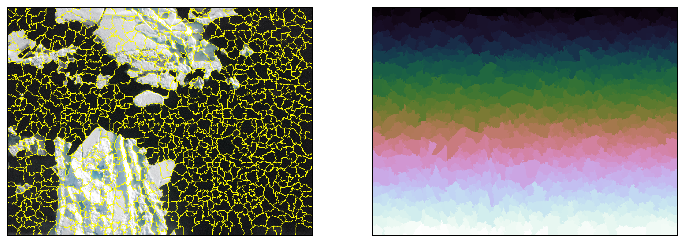

In [37]:
fig4, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
#ax[0].imshow(img)
ax[0].imshow(mark_boundaries(img, labeled_img4))
ax[1].imshow(labeled_img4, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

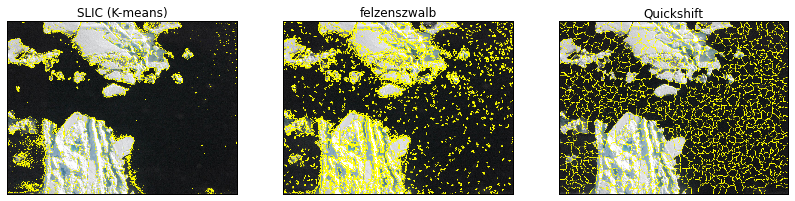

In [38]:
fig5, ax = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
#ax[0].imshow(img)
ax[0].imshow(mark_boundaries(img, labeled_img2))
ax[0].set_title("SLIC (K-means)")
ax[1].imshow(mark_boundaries(img, labeled_img3))
ax[1].set_title("felzenszwalb")
ax[2].imshow(mark_boundaries(img, labeled_img4))
ax[2].set_title("Quickshift")
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()